<a href="https://colab.research.google.com/github/Sanjana-Kannoorkar/Exploratory-Data-Analysis/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
#Loading Necessary Lilbraries
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

In [46]:
#Uplaoding the clean dataset from task 1
uploaded = files.upload()

Saving cleaned_Titanic-Dataset.csv to cleaned_Titanic-Dataset.csv


In [47]:
#Load the dataset
df = pd.read_csv('cleaned_Titanic-Dataset.csv')
print("Data Loaded Successfully")
print(f"Shape : {df.shape}\nColumns: {df.columns.tolist()}")
df.head(5)

Data Loaded Successfully
Shape : (775, 12)
Columns: ['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",1,0.271174,1,0,A/5 21171,0.014151,S
1,2,3,1,3,"Heikkinen, Miss. Laina",0,0.321438,0,0,STON/O2. 3101282,0.015469,S
2,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.434531,1,0,113803,0.103644,S
3,4,5,0,3,"Allen, Mr. William Henry",1,0.434531,0,0,373450,0.015713,S
4,5,6,0,3,"Moran, Mr. James",1,0.346569,0,0,330877,0.016510,Q


In [48]:
#Summary Statistics
print("Numerical Features:")
print(df[['Age', 'Fare']].describe())
print("\nCategorical Features: ")
print("Survived (0 = None, 1 = Yes):")
print(df['Survived'].value_counts(normalize=True))
print("\nSex (0 = Female, 1 = Male): ")
print(df['Sex'].value_counts(normalize=True))

Numerical Features:
              Age        Fare
count  775.000000  775.000000
mean     0.355978    0.034786
std      0.160620    0.026503
min      0.000000    0.000000
25%      0.271174    0.015412
50%      0.346569    0.025374
75%      0.421965    0.050749
max      1.000000    0.126872

Categorical Features: 
Survived (0 = None, 1 = Yes):
Survived
0    0.660645
1    0.339355
Name: proportion, dtype: float64

Sex (0 = Female, 1 = Male): 
Sex
1    0.685161
0    0.314839
Name: proportion, dtype: float64


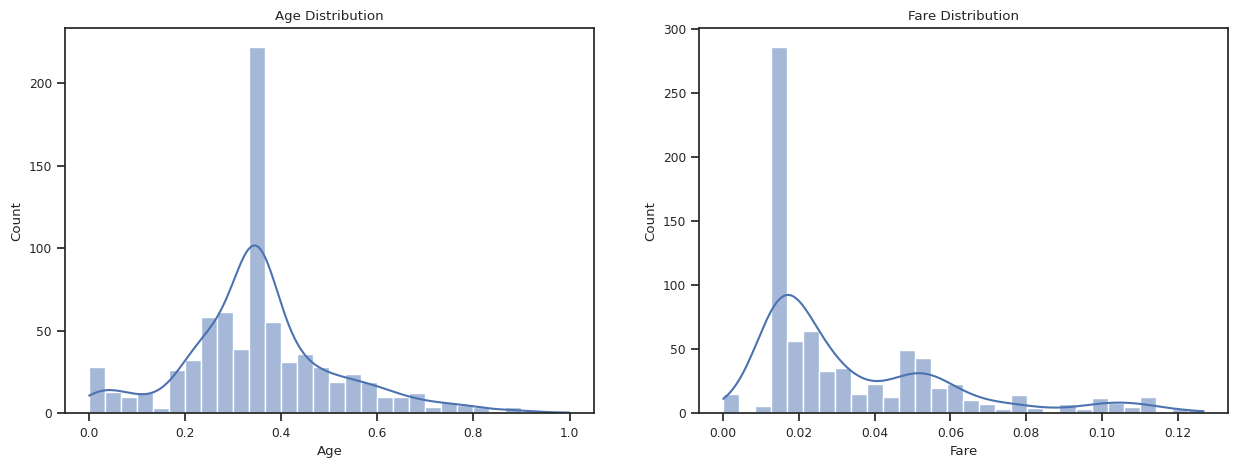

In [49]:
#Creating Histograms for numeric features
plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
sbn.histplot(data = df, x = 'Age', bins = 30, kde = True)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sbn.histplot(data = df, x = 'Fare', bins = 30, kde = True)
plt.title("Fare Distribution")
plt.show()

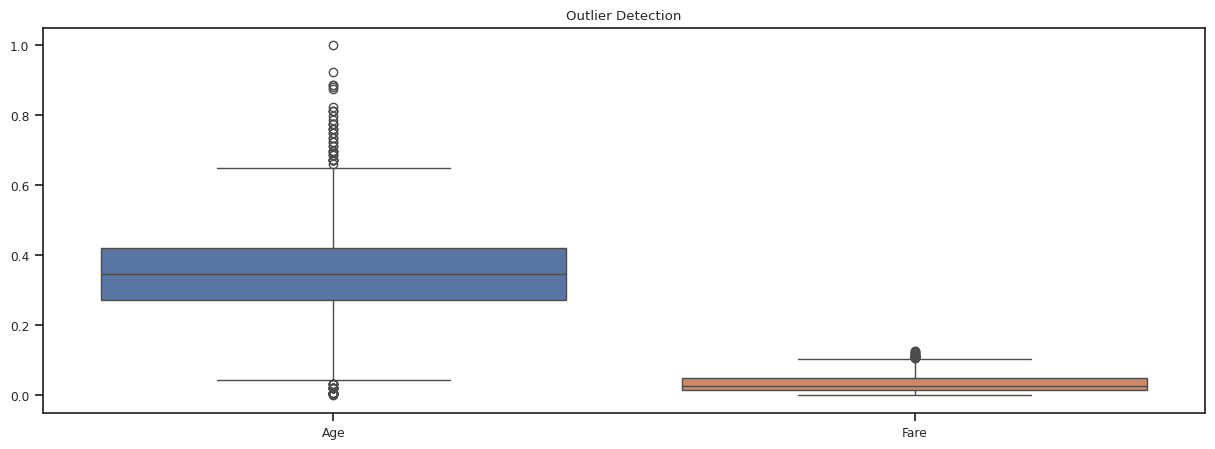

In [51]:
#Creating Boxplots for numeric features
plt.figure(figsize = (15, 5))
sbn.boxplot(data = df[['Age', 'Fare']])
plt.title('Outlier Detection')
plt.show()

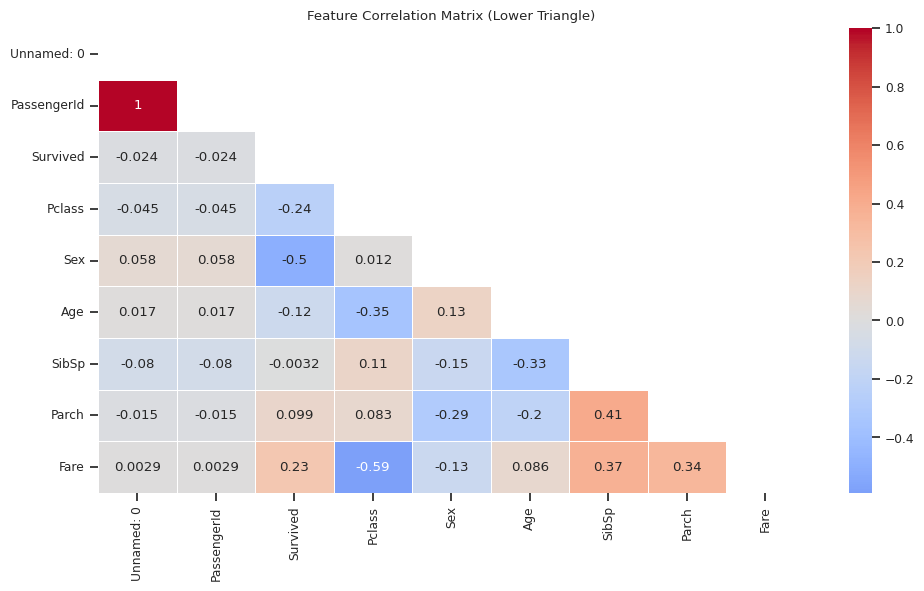

In [53]:
#Correlation Matrix for Feature Relationships
sbn.set(style = "ticks", font_scale = 0.8)

#Correlation Matrix
plt.figure(figsize = (10, 6))
corr_matrix = df.select_dtypes(include = ['number']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sbn.heatmap(corr_matrix, mask = mask, annot = True, cmap = "coolwarm", center = 0, linewidths = 0.5)

plt.title("Feature Correlation Matrix (Lower Triangle)")
plt.tight_layout()
plt.show()

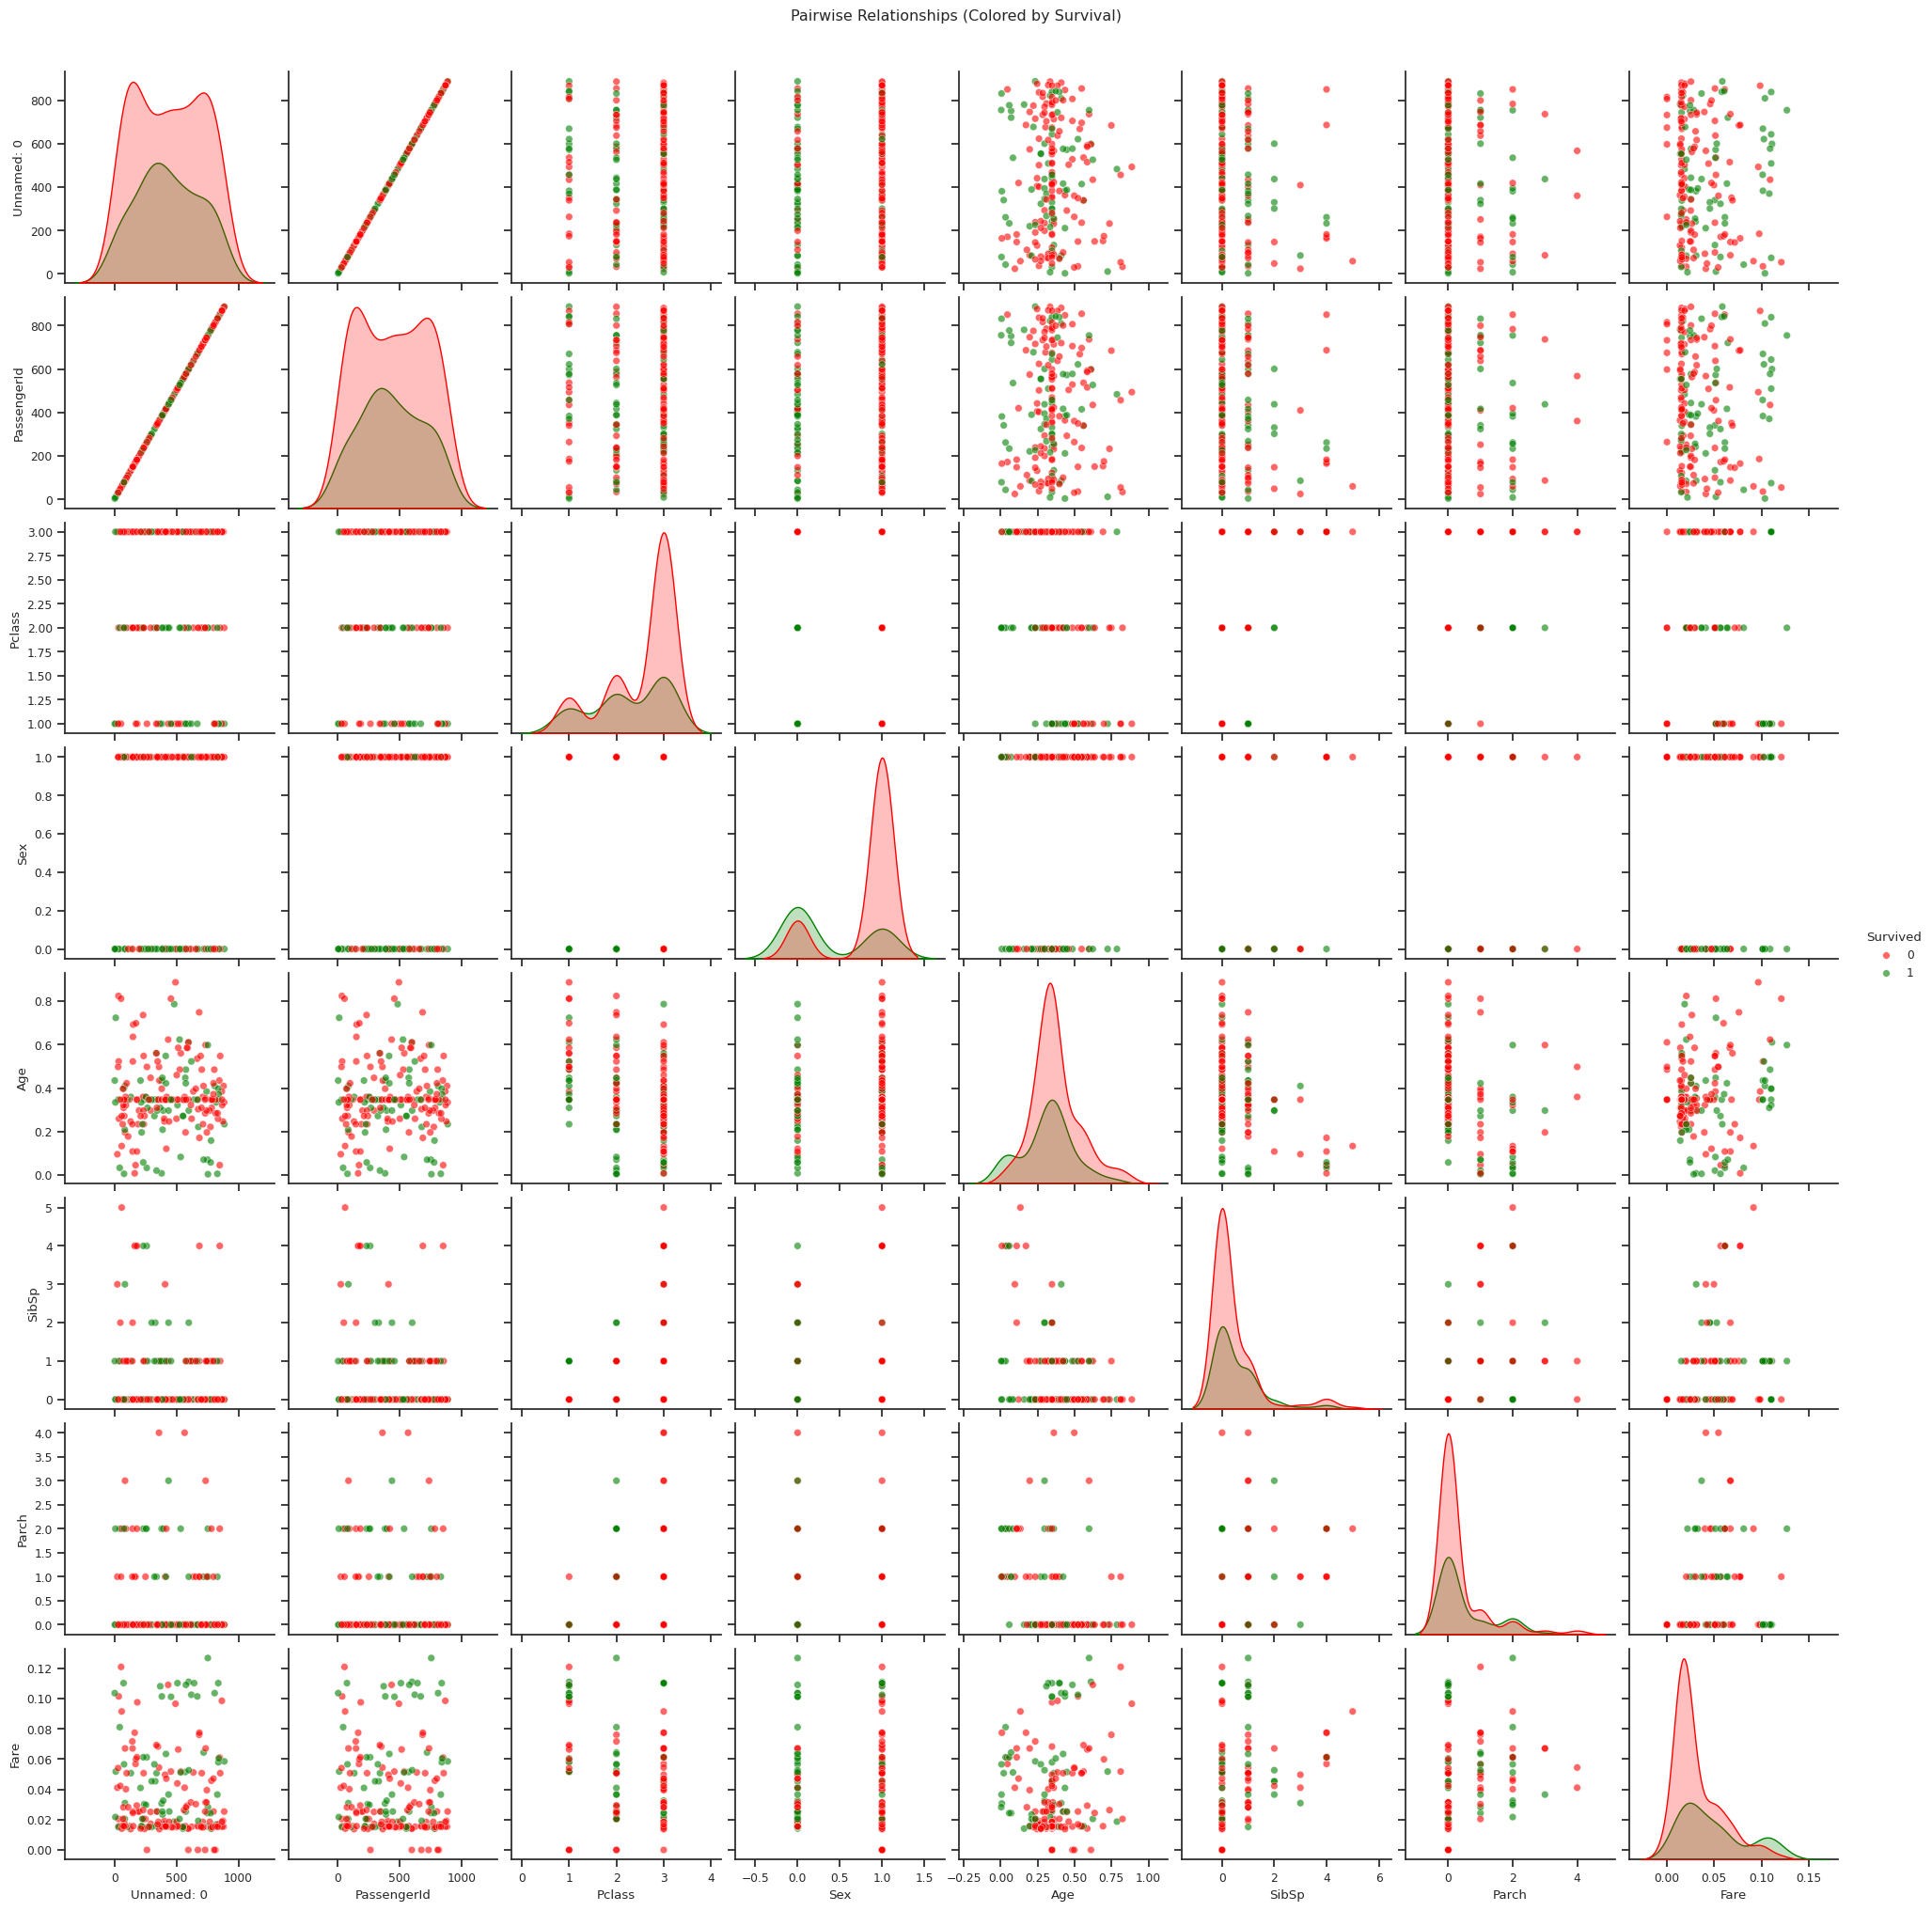

In [56]:
#Pairplot for Feature Relationships
sample_df = df.sample(200, random_state = 42)
numeric_cols = sample_df.select_dtypes(include = ['number']).columns.tolist()
sbn.pairplot(sample_df[numeric_cols], hue = 'Survived', palette = {0: "red", 1: "green"}, plot_kws = {'alpha': 0.6, 's': 30})
plt.suptitle("Pairwise Relationships (Colored by Survival)", y = 1.02)
plt.show()

<ipython-input-75-66cb72bdabe2>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sbn.boxplot(data = df, x = 'Survived', y = 'Fare', palette = ['red', 'green'])


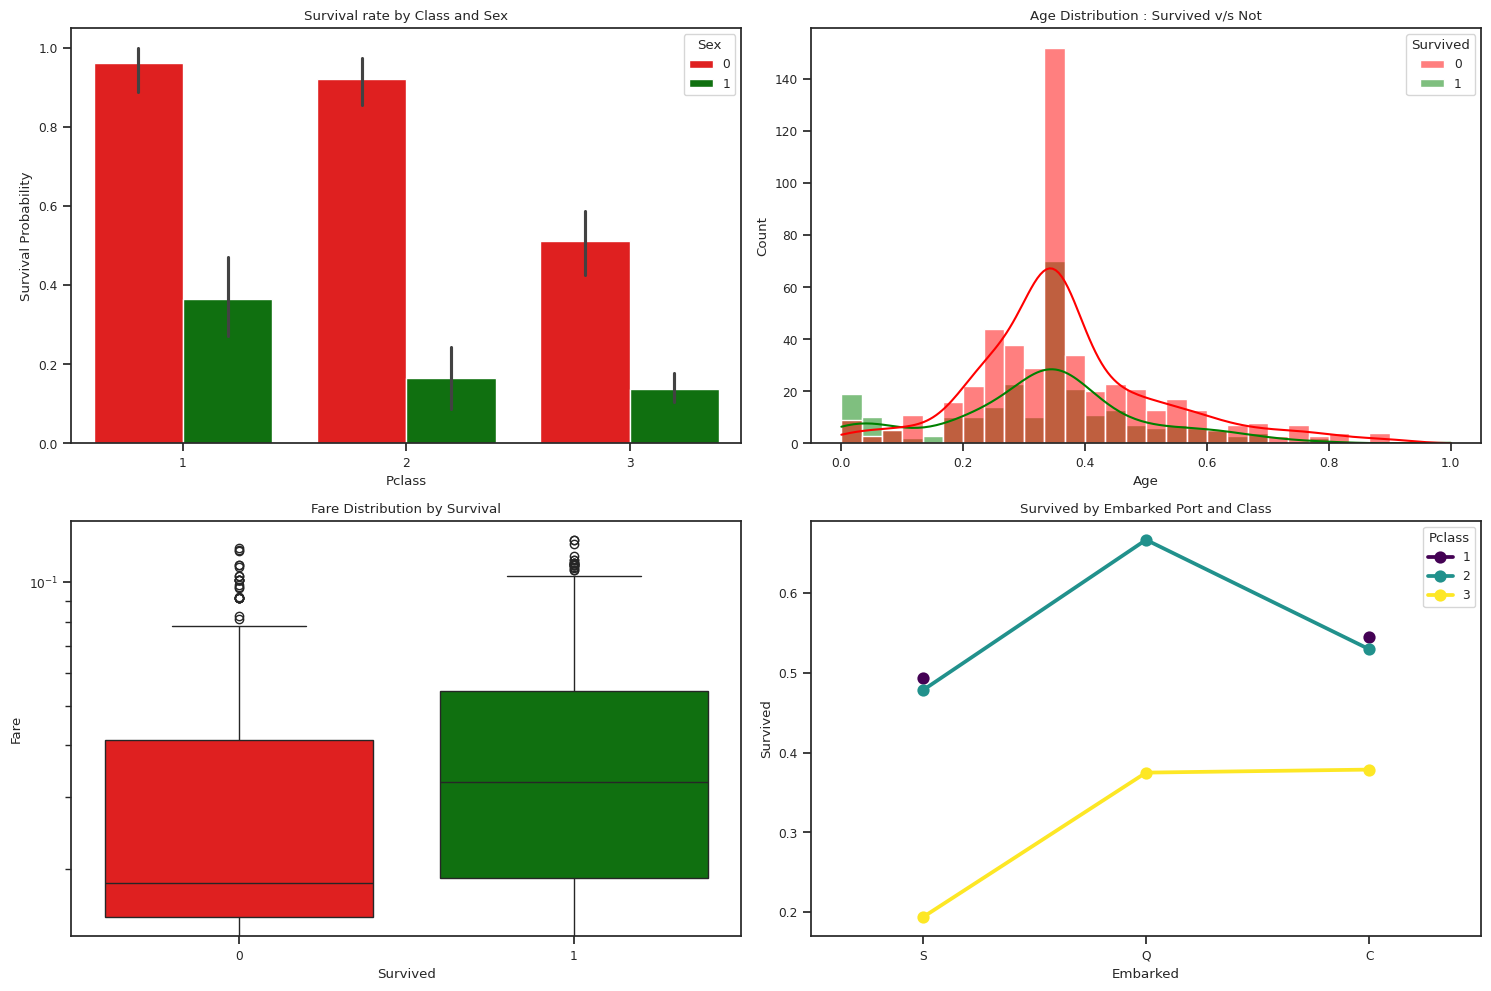

In [75]:
#Identifying Patterns
plt.figure(figsize= (15, 10))

#Pattern 1: Survival by Class and Sex
plt.subplot(2, 2, 1)
sbn.barplot(data = df, x= 'Pclass', y = 'Survived', hue = 'Sex', palette = ['red', 'green'])
plt.title('Survival rate by Class and Sex')
plt.ylabel('Survival Probability')

#Pattern 2: Age Diatribution by Survival
plt.subplot(2, 2, 2)
sbn.histplot (data = df, x = 'Age', hue = 'Survived', bins = 30, kde = True, palette = ['red', 'green'])
plt.title('Age Distribution : Survived v/s Not')

#Pattern 3: Fare vs Survival
plt.subplot(2, 2, 3)
sbn.boxplot(data = df, x = 'Survived', y = 'Fare', palette = ['red', 'green'])
plt.yscale('log')
plt.title('Fare Distribution by Survival')

#Pattern 4: Embarked Port Impact
plt.subplot(2, 2, 4)
sbn.pointplot(data = df, x = 'Embarked', y = 'Survived', hue = 'Pclass', palette = 'viridis', errorbar = None)
plt.title('Survived by Embarked Port and Class')

plt.tight_layout()
plt.show()

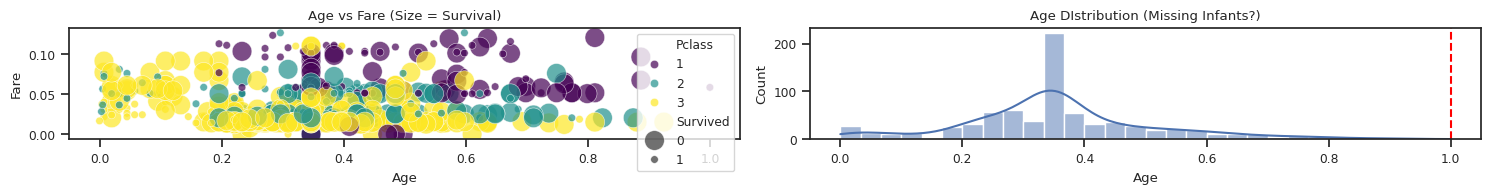

In [82]:
#Identifying Anomaly
plt.figure(figsize = (15, 5))

#Anomaly 1: Extreme Fares
plt.subplot(3, 2, 1)
sbn.scatterplot(data = df, x = 'Age', y = 'Fare', hue = 'Pclass', size = 'Survived', sizes = (30, 200), alpha = 0.7, palette = 'viridis')
plt.title('Age vs Fare (Size = Survival)')

#Anomaly 2: Missing Infants
plt.subplot(3, 2, 2)
sbn.histplot(data = df, x = 'Age', bins = 30, kde = True)
plt.axvline(x = 1, color = 'red', linestyle = '--')
plt.title('Age DIstribution (Missing Infants?)')

plt.tight_layout()
plt.show()